# Preparing the Data

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [142]:
dataset = pd.read_csv('../data/data_with_nan.csv')

### Read the dataset

In [143]:
dataset.head(8)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.0,0.002400,0.1700,16.12,0.0,Red,M
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M
3,2800.0,0.000200,0.1600,16.65,0.0,Red,M
4,NaN,0.000138,0.1030,20.06,0.0,Red,M
5,2840.0,0.000650,0.1100,16.98,0.0,Red,M
6,2637.0,0.000730,0.1270,17.22,0.0,Red,M
7,2600.0,NaN,0.0960,17.40,0.0,Red,M


### Get general information about the dataset

In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         229 non-null    float64
 1   Luminosity(L/Lo)        228 non-null    float64
 2   Radius(R/Ro)            232 non-null    float64
 3   Absolute magnitude(Mv)  228 non-null    float64
 4   Star type               229 non-null    float64
 5   Star color              231 non-null    object 
 6   Spectral Class          226 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.3+ KB


### Fill missing values

In [145]:
# fill missing values with the mean value of the column for numerical columns, and the most frequent value for categorical columns
num_columns = dataset.select_dtypes(include=[np.number]).columns
cat_columns = dataset.select_dtypes(include=[object]).columns

for col in num_columns:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

for col in cat_columns:
    dataset[col].fillna(dataset[col].value_counts().idxmax(), inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    float64
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    float64
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.3+ KB


### Check the target variable

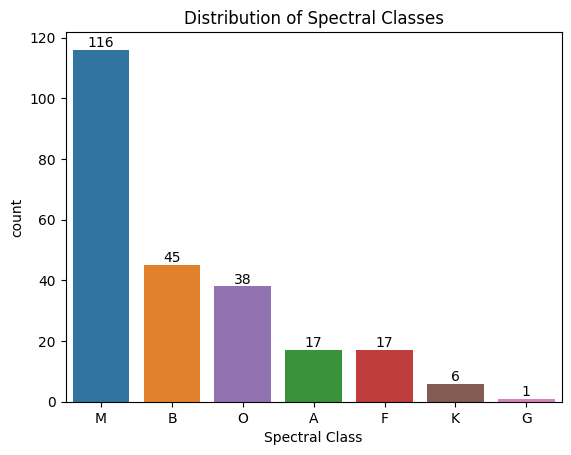

In [146]:
# plot the bar plot of the target variable "Spectral Class" to see the distribution of the classes
sns.countplot(x='Spectral Class', data=dataset, hue='Spectral Class', order=dataset['Spectral Class'].value_counts().index)
plt.title('Distribution of Spectral Classes')
# add the count at the top of each bar
for i in range(dataset['Spectral Class'].nunique()):
    count = dataset['Spectral Class'].value_counts().values[i]
    plt.text(i, count, count, ha='center', va='bottom')
plt.show()

### Remove outliers

In [147]:
# delete the unique apparence of the class "G" in the target variable
dataset = dataset[dataset['Spectral Class'] != 'G']

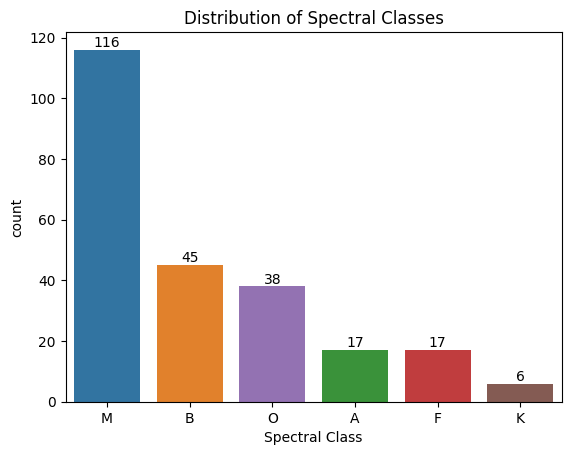

In [148]:
# plot the bar plot of the target variable "Spectral Class" to see the distribution of the classes
sns.countplot(x='Spectral Class', data=dataset, hue='Spectral Class', order=dataset['Spectral Class'].value_counts().index)
plt.title('Distribution of Spectral Classes')
# add the count at the top of each bar
for i in range(dataset['Spectral Class'].nunique()):
    count = dataset['Spectral Class'].value_counts().values[i]
    plt.text(i, count, count, ha='center', va='bottom')
plt.show()

### Balance the target variable using SMOTE

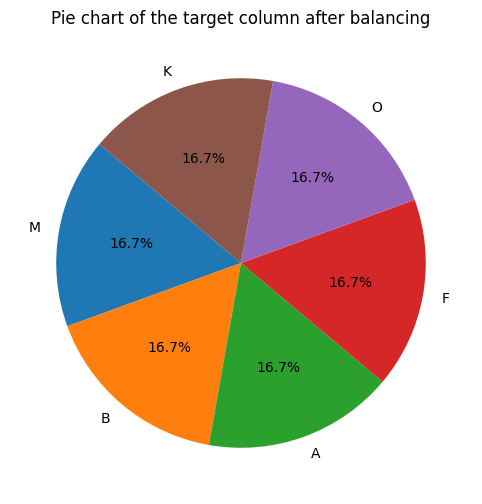

In [149]:
# balance the dataset using the SMOTE technique
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# encode the categorical columns to numerical columns
le_color, le_class = LabelEncoder(), LabelEncoder()
dataset['Spectral Class'] = le_class.fit_transform(dataset['Spectral Class'])
dataset['Star color'] = le_color.fit_transform(dataset['Star color'])

# split the dataset into features and target
X = dataset.drop('Spectral Class', axis=1)
y = dataset['Spectral Class']

# apply the SMOTE technique
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# reverse the encoding of the target column
y = le_class.inverse_transform(y)
dataset['Spectral Class'] = le_class.inverse_transform(dataset['Spectral Class'])
dataset['Star color'] = le_color.inverse_transform(dataset['Star color'])

# plot the pie chart for the target column after balancing
plt.figure(figsize=(10, 6))
plt.pie(pd.Series(y).value_counts(), labels=pd.Series(y).value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of the target column after balancing')
plt.show()


In [150]:
# new size of the dataset
X.shape, y.shape

((696, 6), (696,))

### Get some visualizations

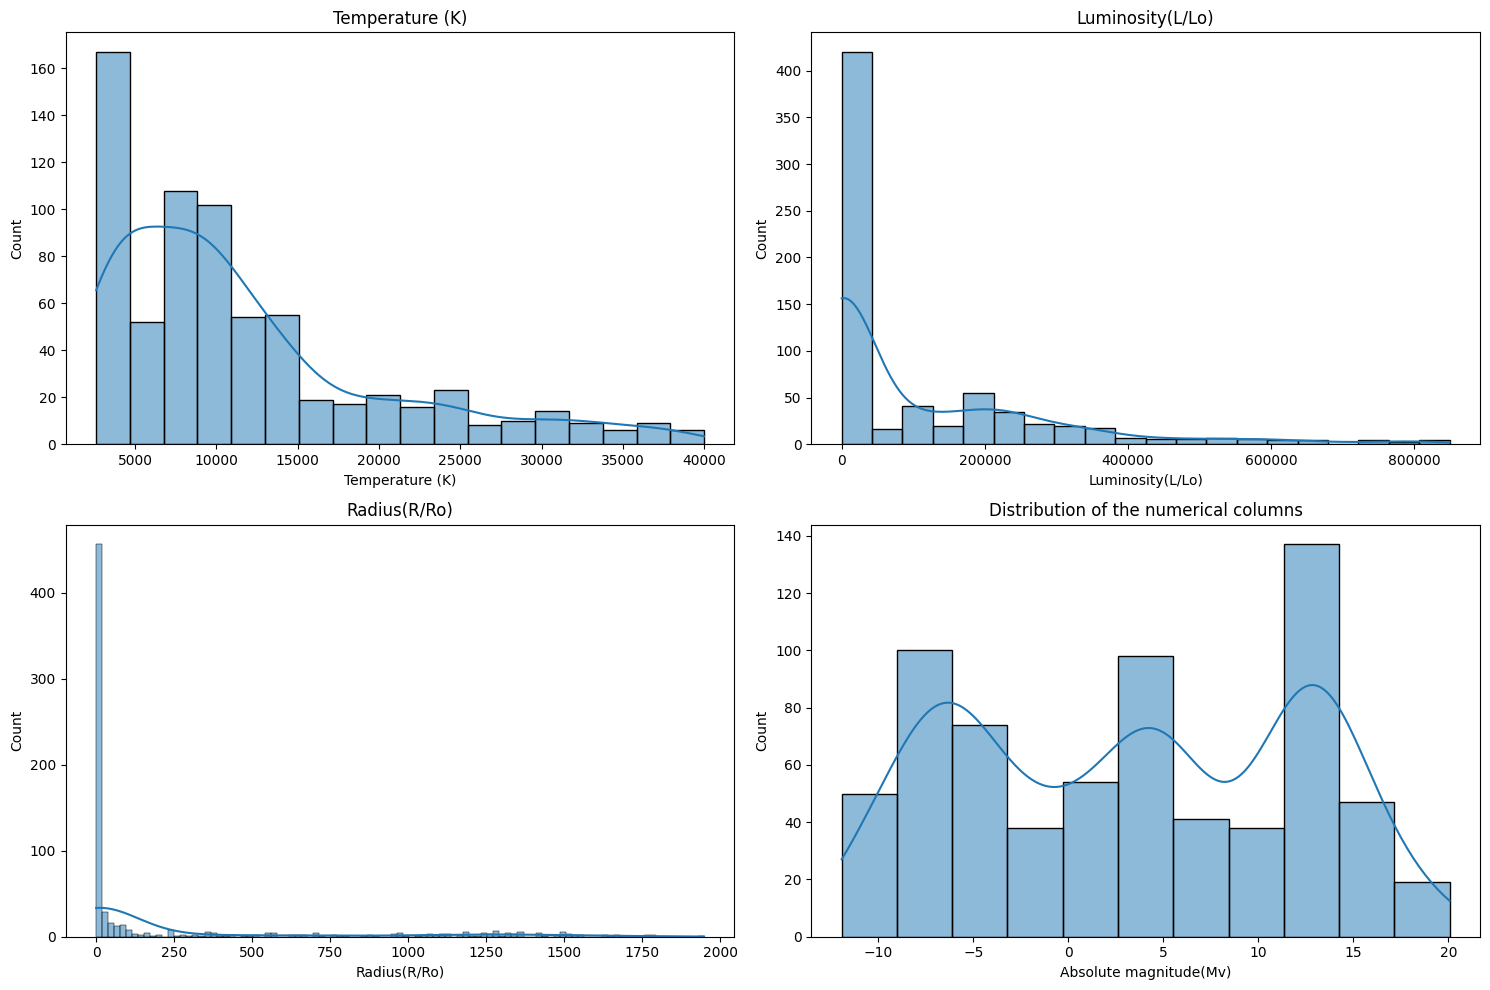

In [151]:
# plot the distribution of the numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    if i == 4:
        break
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.title('Distribution of the numerical columns')
plt.tight_layout()
plt.show()

### Study the correlation relationships the features

1. Correlation

In [152]:
# latexify.expression works similarly, but does not output the signature.
@latexify.function
# correlation formula
def corr(x, y):
    return (1 / (len(x) - 1)) * sum((x - np.sum(x) / len(x)) * (y - np.sum(y) / len(y))) / (np.sqrt(sum((x - np.sum(x) / len(x)) ** 2) * sum((y - np.sum(y) / len(y)) ** 2)))


corr

In [153]:
dataset["Spectral Class"] = le_class.fit_transform(dataset["Spectral Class"])
dataset["Star color"] = le_color.fit_transform(dataset["Star color"])

In [154]:
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.000000,0.002400,0.1700,16.12,0.0,10,4
1,3042.000000,0.000500,0.1542,16.60,0.0,10,4
2,2600.000000,0.000300,0.1020,18.70,0.0,10,4
3,2800.000000,0.000200,0.1600,16.65,0.0,10,4
4,10467.934498,0.000138,0.1030,20.06,0.0,10,4


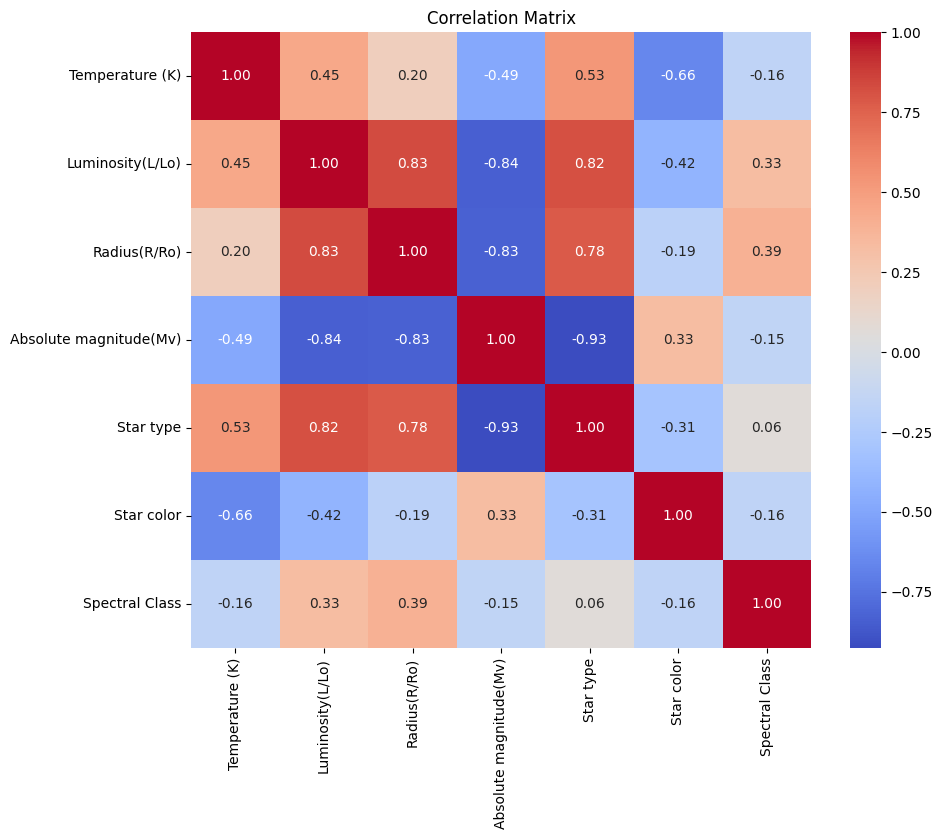

In [155]:
# plot the correlation matrix of the dataframe "dataset"
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(method = 'spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

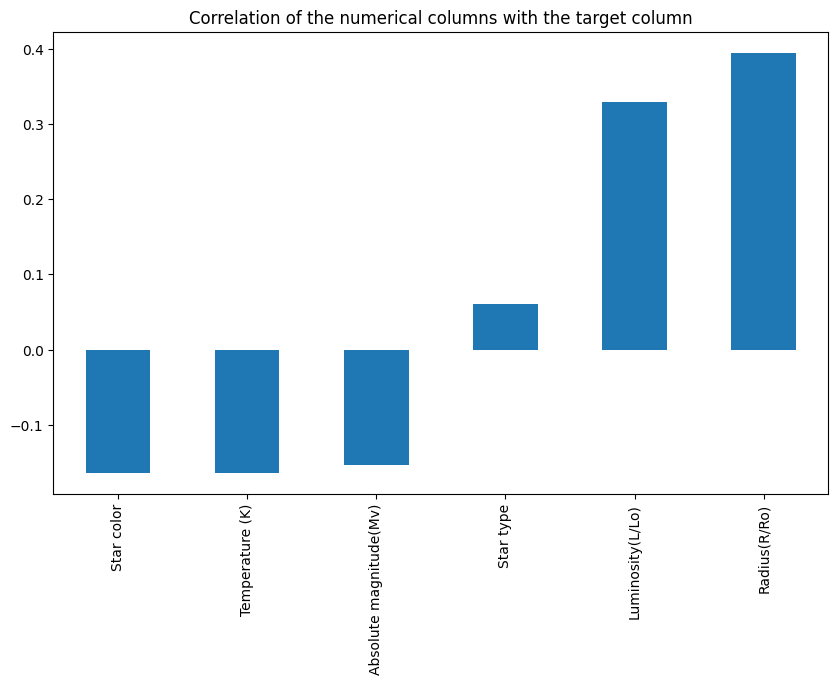

In [156]:
# plot the correlation matrix of the numerical columns as bar plot
plt.figure(figsize=(10, 6))
dataset.corr(method='spearman')['Spectral Class'].drop('Spectral Class').sort_values().plot(kind='bar')
plt.title('Correlation of the numerical columns with the target column')
plt.show()

2. Mutual Information

<Figure size 1000x600 with 0 Axes>

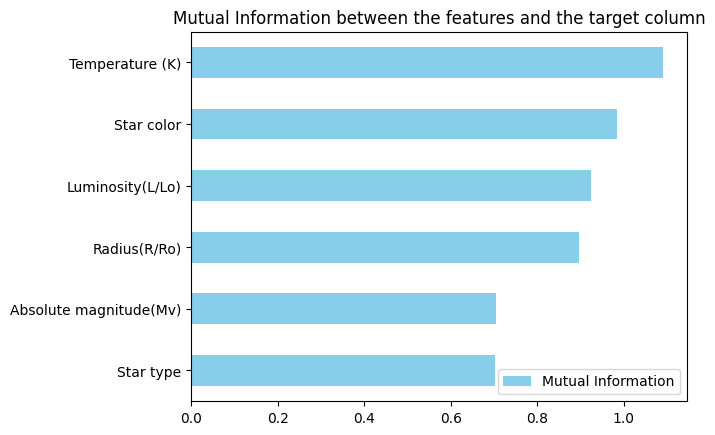

In [158]:
# mutual information between the numerical columns and the target column
from sklearn.feature_selection import mutual_info_classif

# apply the mutual_info_classif function
mi = mutual_info_classif(X, y)

# create a dataframe of the mutual information values
mi_df = pd.DataFrame(data=mi, index=X.columns, columns=['Mutual Information'])

# plot the mutual information values as bar plot
plt.figure(figsize=(10, 6))
mi_df.sort_values(by='Mutual Information').plot(kind='barh', color='skyblue')
plt.title('Mutual Information between the features and the target column')
plt.show()

### Save the dataset for the next step

In [157]:
# save the balanced dataset
dataset = pd.concat([X, pd.Series(y, name='Spectral Class')], axis=1)
dataset.to_csv('../data/clean_data.csv', index=False)